<a href="https://colab.research.google.com/github/jason96819/Studying/blob/main/nlp/3_%EA%B5%B0%EC%A7%91_%EB%B6%84%EC%84%9D(Cluster_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def jaccard_similarity(d1, d2):
  lemmatizer = WordNetLemmatizer()

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))

  return inter/union

In [ ]:
d1 = "Think like a man of action and act like man of thought."
d2 = "Try no to become a man of success but rather try to become a man of value."
d3 = "Give me liberty, of give me death."

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.2222222222222222
0.13333333333333333
0.11764705882352941


In [ ]:
tiv = TfidfVectorizer()
corpus = [d1, d2, d3]

tfidf = tiv.fit_transform(corpus).todense()

print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

## 한국어 형태소 분석기 설치

In [ ]:
!pip install konlpy                                                         #pip, sudo bash

     |████████████████████████████████| 19.4 MB 1.6 MB/s 
     |████████████████████████████████| 448 kB 43.6 MB/s 


* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [85.2 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [748 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [ ]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [ ]:
raw = [x.encode().decode() for x in raw[1:10000]]

reviews = []
for i in raw:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.', '사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화']


In [ ]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '가', '아니', '라', '병', '쉰', '인', '듯'], ['내',

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [ ]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [ ]:
word2vec.most_similar('영화')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('작품', 0.9510008692741394),
 ('듯', 0.947563886642456),
 ('마음', 0.9433139562606812),
 ('따뜻', 0.9405059814453125),
 ('가슴', 0.9365872144699097),
 ('잔잔', 0.9312896728515625),
 ('이야기', 0.9293332099914551),
 ('바탕', 0.9287720322608948),
 ('표현', 0.9280915260314941),
 ('느낌', 0.9258657097816467)]

* t-sne을 이용한 단어 벡터 시각화

In [ ]:
tsne = TSNE(n_components=2)                                            #2차원으로 만든다
tsne

TSNE()

In [ ]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]
similarity                                                                                                 #vocab에 해당된결과가 similartiy로 계산된결과값들

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-0.7038644 , -0.41015568,  0.8485332 , ...,  0.87844086,
        -0.47274122,  1.2540345 ],
       [-0.5298669 , -0.36084294,  0.5251257 , ...,  0.4124799 ,
        -0.32026112,  0.42721918],
       [-0.44723564, -0.43128306,  0.8731496 , ...,  0.76215065,
        -0.57871747,  1.0836157 ],
       ...,
       [-0.03687314, -0.02130919,  0.05003768, ..., -0.0082536 ,
        -0.02681727,  0.03490365],
       [-0.04324267, -0.02515188,  0.04120829, ...,  0.01756986,
        -0.02680928,  0.057975  ],
       [-0.05257114, -0.0251449 ,  0.06576083, ...,  0.00844752,
        -0.03995867,  0.05536077]], dtype=float32)

In [ ]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x', 'y'])                                                #2차원으로 변환, 좌표값
df[0:10]                                                                                                                                                   #0부터10까지출력

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,x,y
을,-40.438042,35.492115
배우,-36.442474,28.204254
는,-40.400150,35.474052
학생,23.980865,-40.560707
으로,-37.578087,30.299650
",",-36.687237,32.291344
외국,37.216465,-8.059260
와,-36.548038,28.398111
그,-38.275856,34.059391
들,-38.333683,34.026279


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


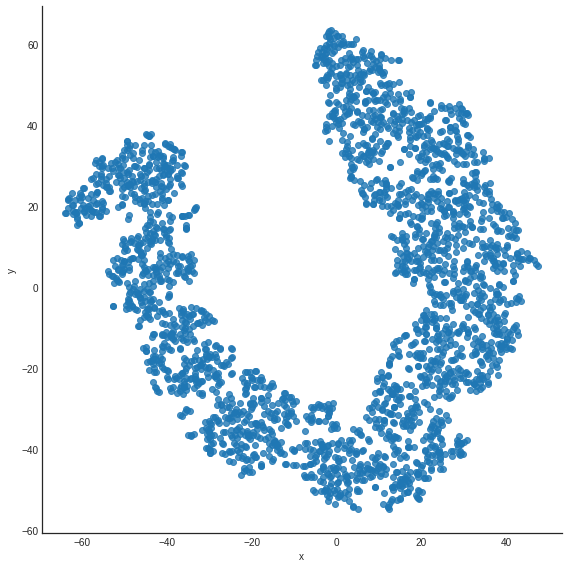

In [ ]:
#@title
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot('x', 'y', data=df, fit_reg=False, size=8)
plt.show()                                                              #워투벡을 tsne알고리즘을 통해서2차원형태로바꾼 모양

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')                            #클러스터수 지정, linkage->ward, average, complete
predict = ward.fit_predict(df)
predict

array([4, 4, 4, ..., 1, 1, 1])

In [ ]:
results = df
results['predict'] = predict
results[0:10]                                                                    #어느 클러스터에 저장되어있는지 왜 이렇게 하냐면 시각화하기위해서

,x,y,predict
을,-40.438042,35.492115,4
배우,-36.442474,28.204254,4
는,-40.400150,35.474052,4
학생,23.980865,-40.560707,3
으로,-37.578087,30.299650,4
",",-36.687237,32.291344,4
외국,37.216465,-8.059260,0
와,-36.548038,28.398111,4
그,-38.275856,34.059391,4
들,-38.333683,34.026279,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


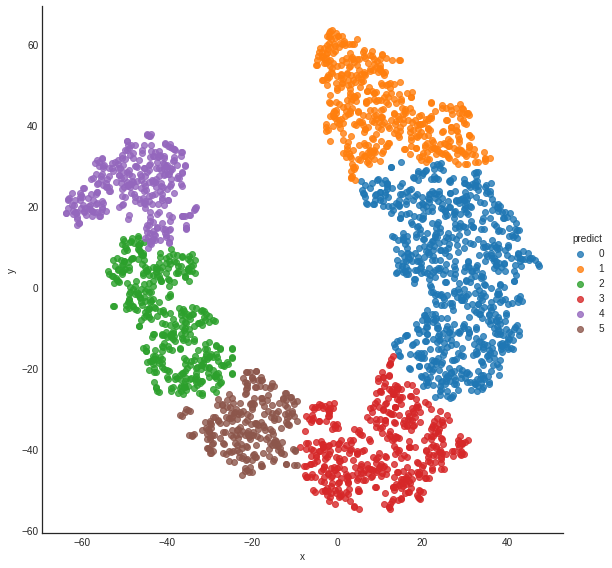

In [ ]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=8, hue="predict")
plt.show()

#### average

In [ ]:
avg = AgglomerativeClustering(n_clusters=6, linkage='average')                            #클러스터수 지정, linkage->ward, average, complete
predict = avg.fit_predict(df)
predict

array([1, 1, 1, ..., 4, 4, 4])

In [ ]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
을,-40.438042,35.492115,1
배우,-36.442474,28.204254,1
는,-40.400150,35.474052,1
학생,23.980865,-40.560707,3
으로,-37.578087,30.299650,1
",",-36.687237,32.291344,1
외국,37.216465,-8.059260,5
와,-36.548038,28.398111,1
그,-38.275856,34.059391,1
들,-38.333683,34.026279,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


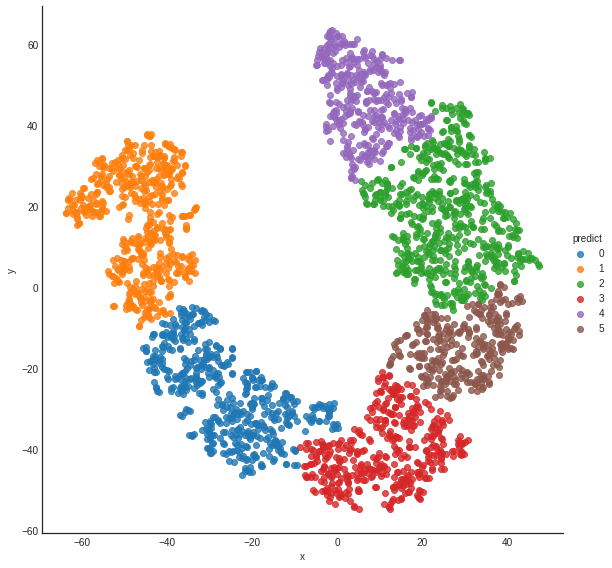

In [ ]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=8, hue="predict")                   #색깔이 지정하는 위치가 ward와 다름
plt.show()

#### complete

In [ ]:
compl = AgglomerativeClustering(n_clusters=6, linkage='complete')                            #클러스터수 지정, linkage->ward, average, complete
predict = compl.fit_predict(df)
predict

array([5, 5, 5, ..., 2, 2, 2])

In [ ]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
을,-40.438042,35.492115,5
배우,-36.442474,28.204254,5
는,-40.400150,35.474052,5
학생,23.980865,-40.560707,1
으로,-37.578087,30.299650,5
",",-36.687237,32.291344,5
외국,37.216465,-8.059260,0
와,-36.548038,28.398111,5
그,-38.275856,34.059391,5
들,-38.333683,34.026279,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


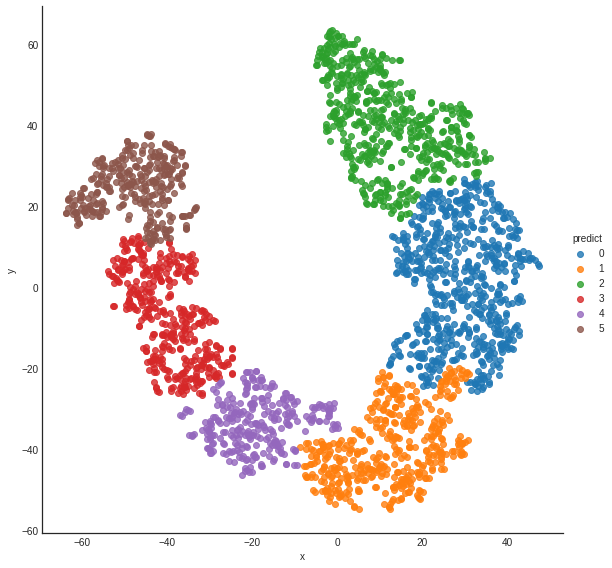

In [ ]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=8, hue="predict")                   #색깔이 지정하는 위치가 ward와 다름
plt.show()

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric='euclidean')                                    #w2v에서 만든 df를 유클리디안 거리 계산으로 euclidean을 넣어준다.
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist                                                                                     #거리가 계산되어있는 metrix값

,0,1,2,3,4,5,6,7,8,9,...,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,8.311286,0.041976,99.748821,5.927987,4.930870,89.173677,8.090551,2.593790,2.564566,...,65.801523,48.892118,85.716050,46.741978,64.006972,40.652343,60.226503,42.857459,51.756093,50.073355
1,8.311286,0.000000,8.277268,91.627506,2.383338,4.094412,82.253765,0.220736,6.135464,6.121491,...,59.302360,49.758290,77.832543,48.241443,61.448407,39.004716,56.205040,43.722352,52.012795,49.613714
2,0.041976,8.277268,0.000000,99.710580,5.893936,4.890333,89.131859,8.056532,2.552233,2.523159,...,65.759669,48.868325,85.676318,46.720825,63.971686,40.618887,60.187556,42.833269,51.729952,50.044400
3,99.748821,91.627506,99.710580,0.000000,93.950491,94.889620,35.107337,91.842620,97.262832,97.274465,...,48.343370,102.782993,16.871627,105.460756,84.080089,87.647739,72.237653,100.633875,100.246531,95.448614
4,5.927987,2.383338,5.893936,93.950491,0.000000,2.181847,84.205885,2.162603,3.823942,3.802459,...,61.113847,49.357149,80.080675,47.657043,62.068089,39.293509,57.253572,43.301897,51.791609,49.592206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,40.652343,39.004716,40.618887,87.647739,39.293509,37.819596,64.059785,39.025875,38.865803,38.929784,...,41.066976,16.479350,70.962407,18.187052,23.696269,0.000000,23.567965,13.042582,16.017098,11.955162
2635,60.226503,56.205040,60.187556,72.237653,57.253572,56.355676,43.390215,56.299131,57.991966,58.048231,...,24.123656,33.364898,55.559829,36.986074,12.447974,23.567965,0.000000,33.632785,29.783448,25.441059
2636,42.857459,43.722352,42.833269,100.633875,43.301897,41.408323,76.023495,43.678548,41.735805,41.802201,...,53.618325,6.072508,83.913255,5.485738,29.100602,13.042582,33.632785,0.000000,9.318561,9.915664
2637,51.756093,52.012795,51.729952,100.246531,51.791609,49.988256,73.130033,51.988196,50.488647,50.555146,...,52.206624,4.521803,83.424203,8.674325,22.344128,16.017098,29.783448,9.318561,0.000000,4.839702


* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

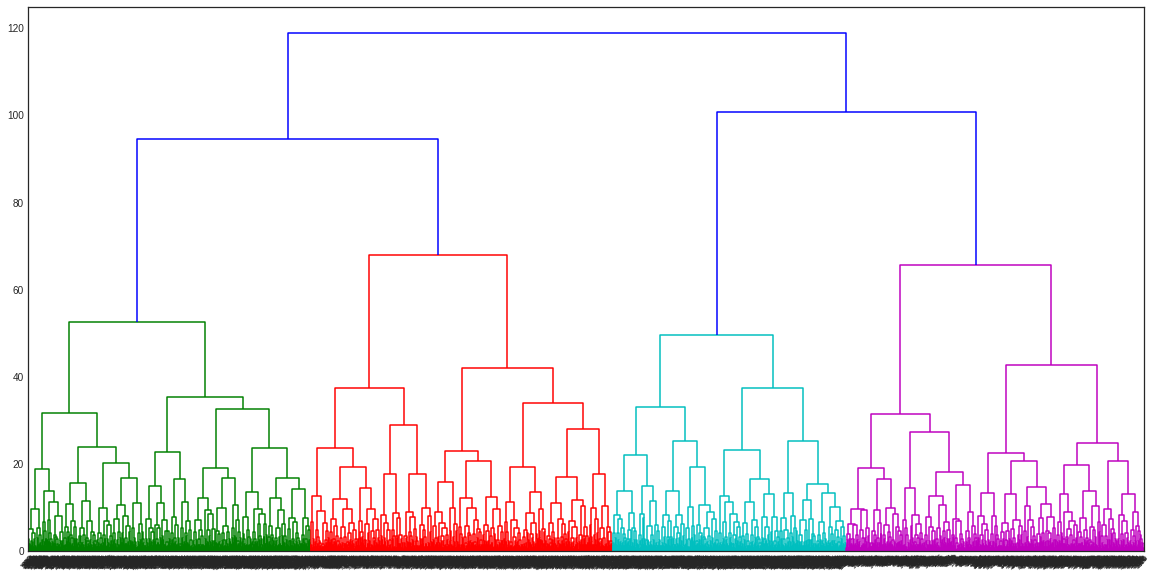

In [ ]:
row_clusters = linkage(distmatrix, method='complete')

plt.figure(figsize=(20, 10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)

plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

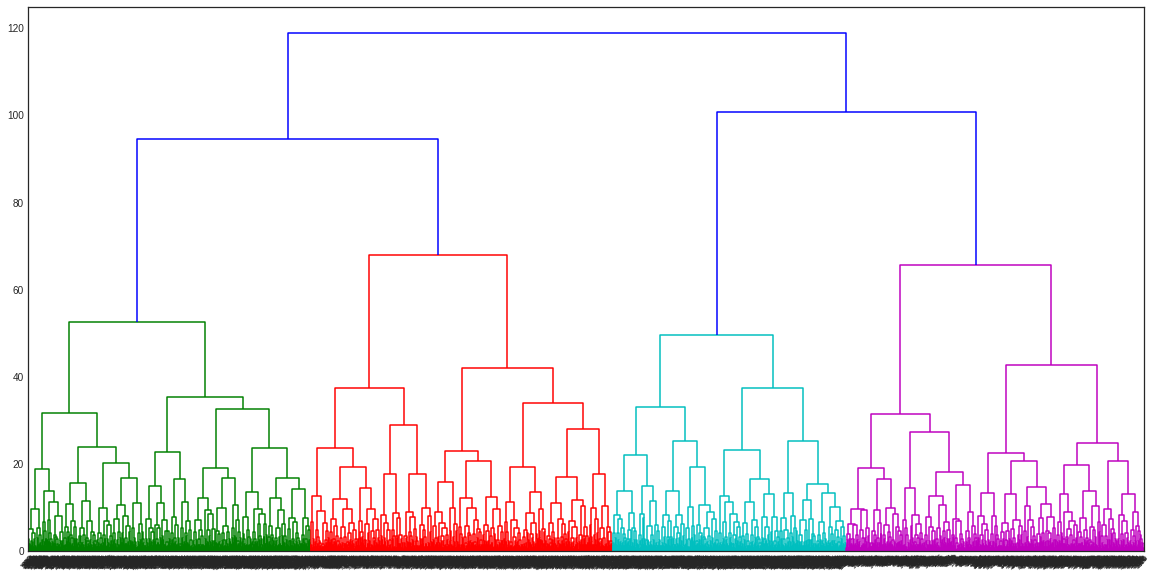

In [ ]:
mergins = linkage(df, method='complete')

plt.figure(figsize=(20, 10))
dendrogram(mergins,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [ ]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
을,-40.438042,35.492115,1
배우,-36.442474,28.204254,1
는,-40.400150,35.474052,1
학생,23.980865,-40.560707,0
으로,-37.578087,30.299650,1
",",-36.687237,32.291344,1
외국,37.216465,-8.059260,0
와,-36.548038,28.398111,1
그,-38.275856,34.059391,1
들,-38.333683,34.026279,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


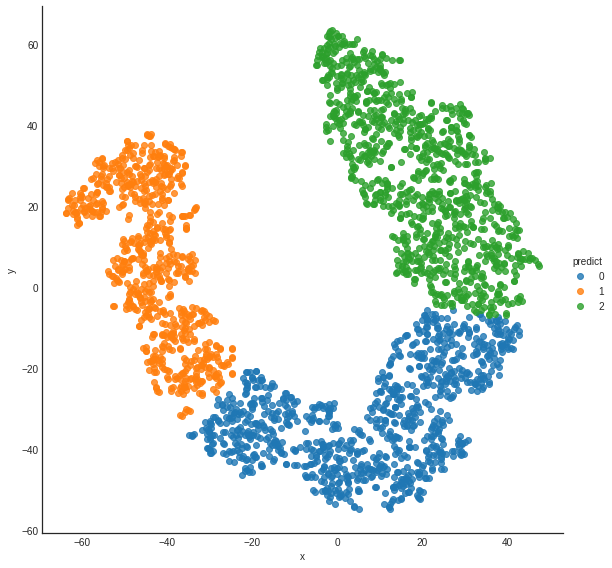

In [ ]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=8, hue="predict")
plt.show()

### 클러스터 개수 6

In [ ]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([4, 4, 4, ..., 1, 1, 1], dtype=int32)

In [ ]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
을,-40.438042,35.492115,4
배우,-36.442474,28.204254,4
는,-40.400150,35.474052,4
학생,23.980865,-40.560707,0
으로,-37.578087,30.299650,4
",",-36.687237,32.291344,4
외국,37.216465,-8.059260,5
와,-36.548038,28.398111,4
그,-38.275856,34.059391,4
들,-38.333683,34.026279,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


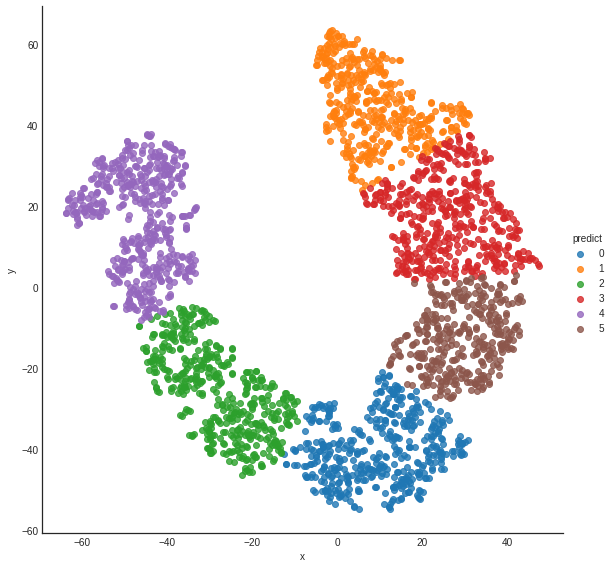

In [ ]:
sns.lmplot('x', 'y', data=results, fit_reg=False, size=8, hue="predict")
plt.show()